In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
data_path = "dataset/winequality-red.csv"
wine_df = pd.read_csv(data_path)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
wine_df.shape

(1599, 12)

In [84]:
wine_df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [85]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [86]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [87]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

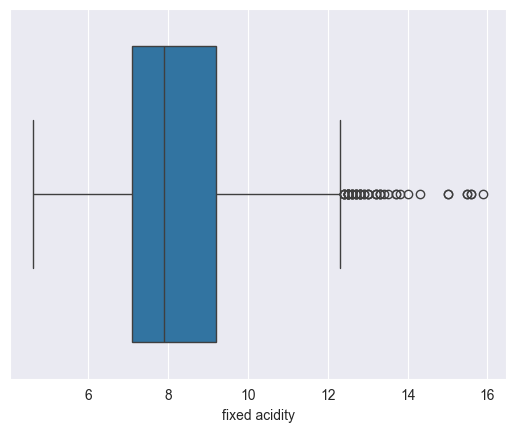

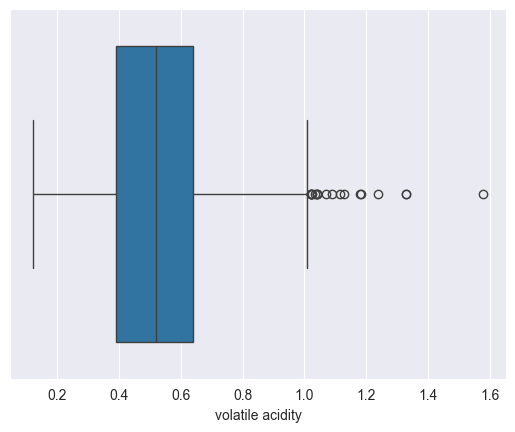

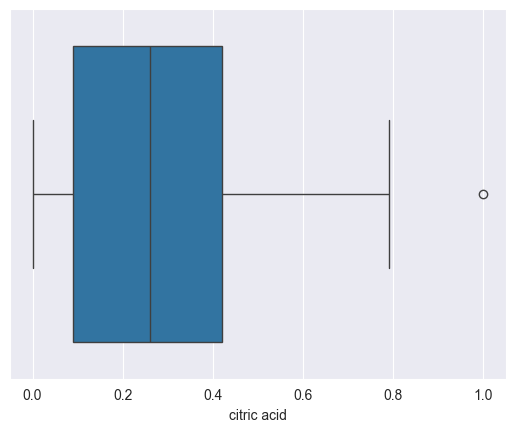

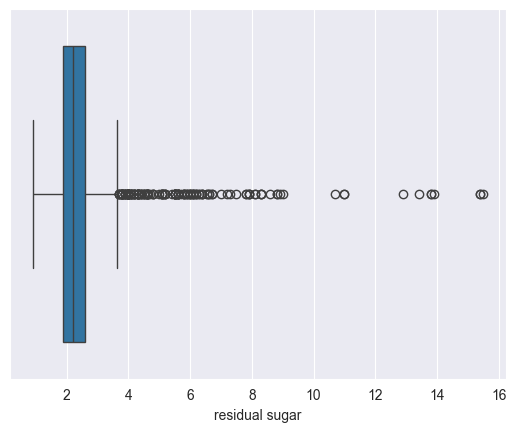

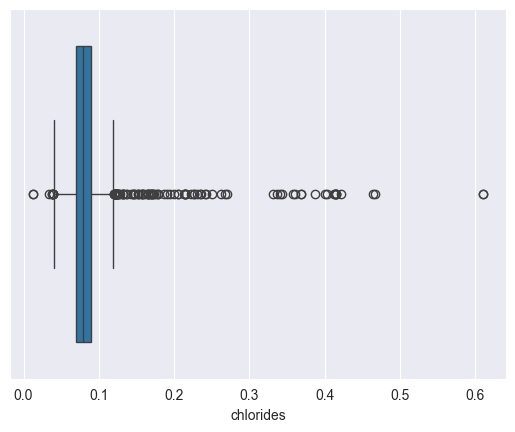

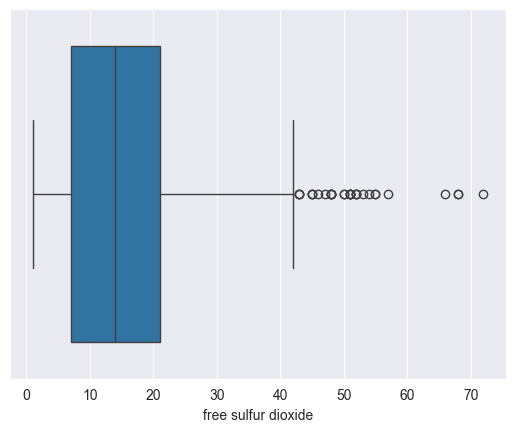

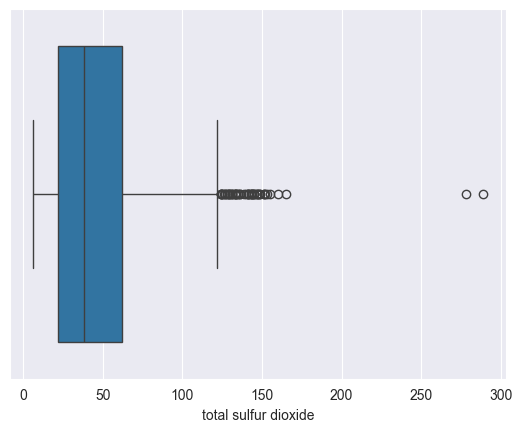

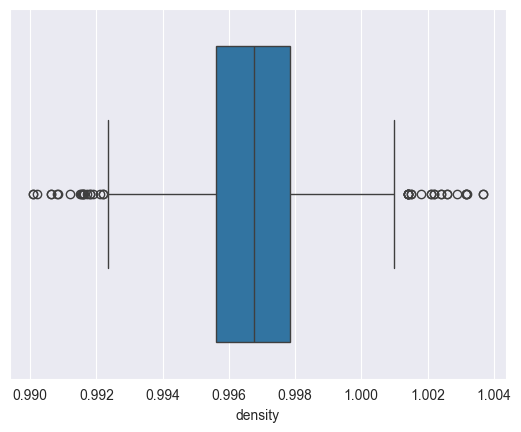

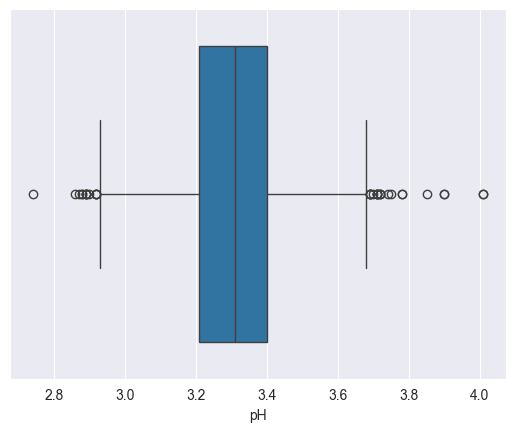

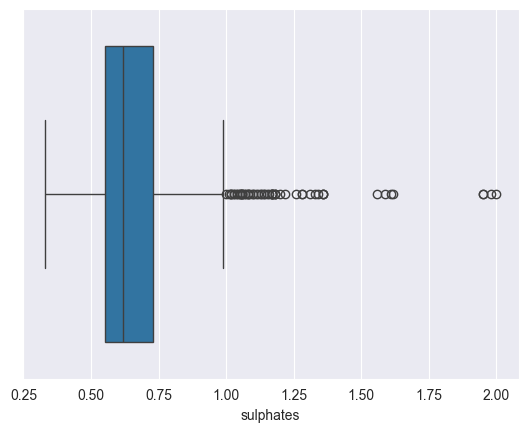

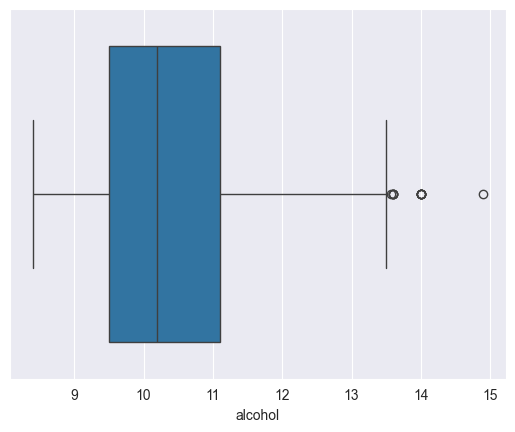

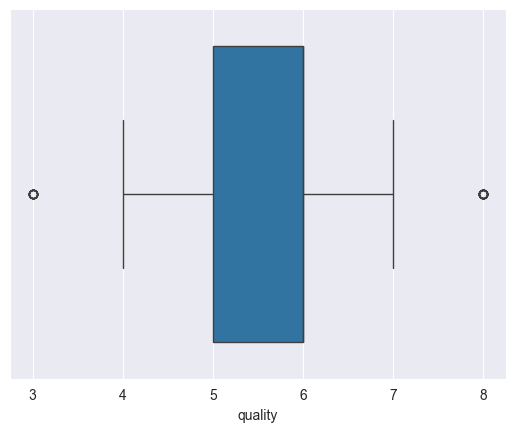

In [88]:
# box plot for all columns
for i in wine_df.columns:
    sns.boxplot(x=wine_df[i])
    plt.show()

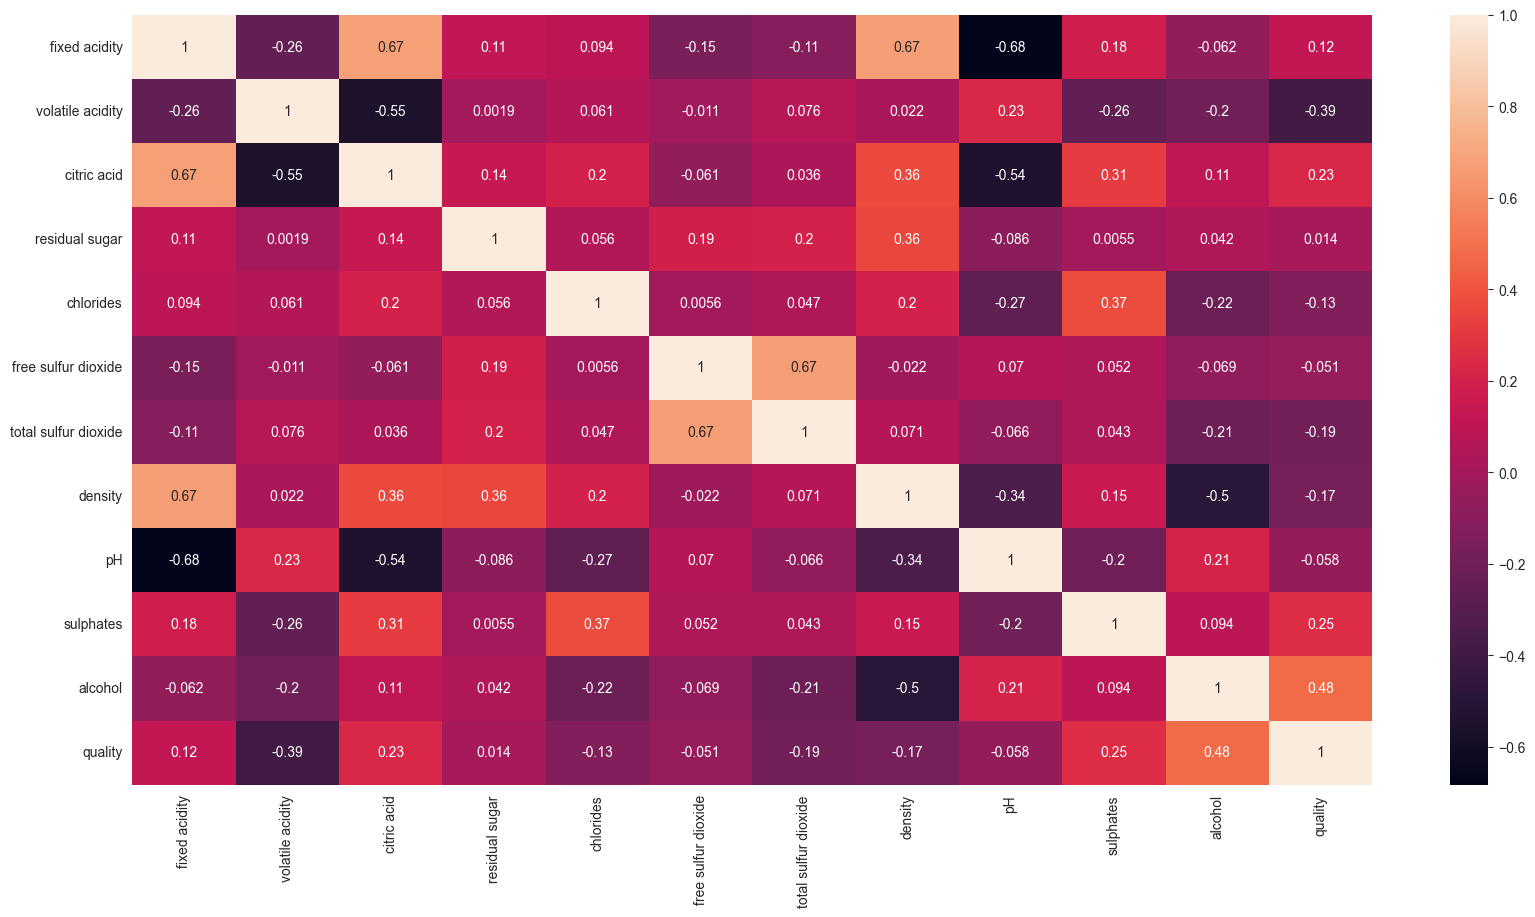

In [89]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(wine_df.corr(), annot=True)
plt.show()

In [90]:
# copy for visualization
wine_df_copy = wine_df.copy()

<Axes: xlabel='quality', ylabel='count'>

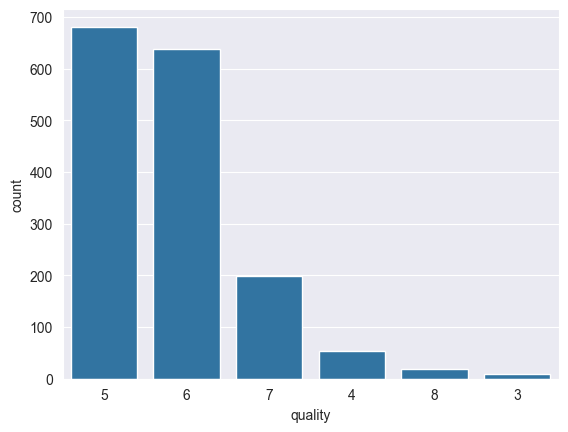

In [91]:
# plotting counts of category
wine_df_copy.quality = wine_df_copy.quality.map({0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10'})
sns.countplot(x="quality", data=wine_df_copy)

<Axes: ylabel='Density'>

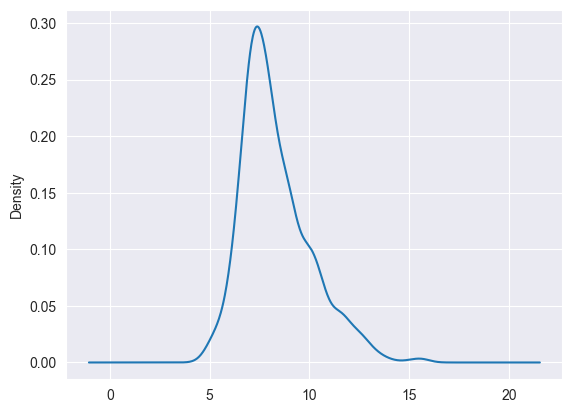

In [92]:
# ked plot to view distribution
wine_df_copy['fixed acidity'].plot.kde()

<Axes: ylabel='Density'>

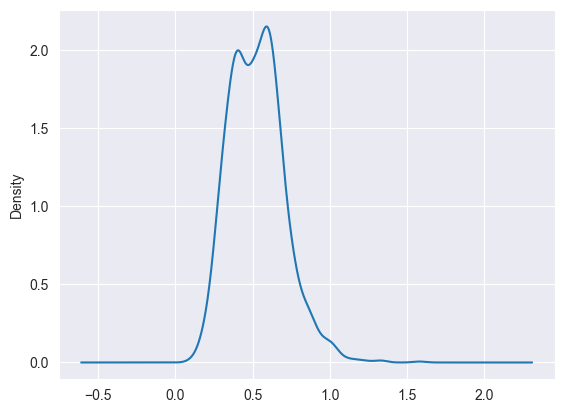

In [93]:
wine_df_copy['volatile acidity'].plot.kde()

<Axes: ylabel='Density'>

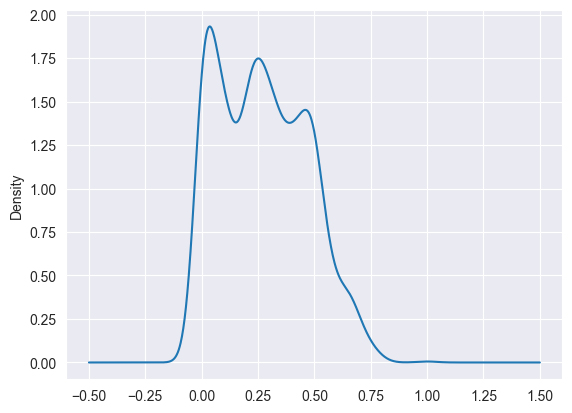

In [94]:
wine_df_copy['citric acid'].plot.kde()

Text(0.5, 1.0, 'fixed acidity vs quality')

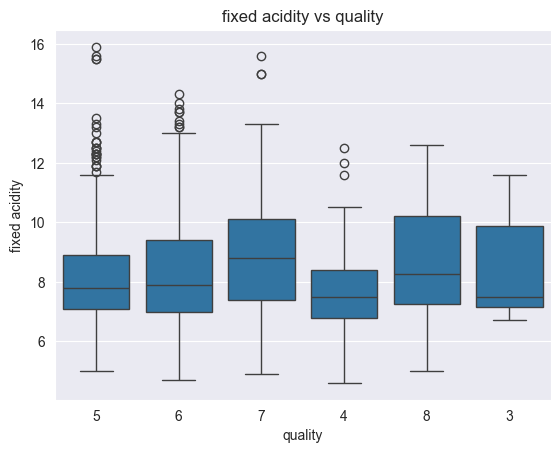

In [95]:
# compare quality with fixed acidity
sns.boxplot(x=wine_df_copy['quality'], y=wine_df_copy['fixed acidity'])
plt.title('fixed acidity vs quality')

Text(0.5, 1.0, 'volatile acidity vs quality')

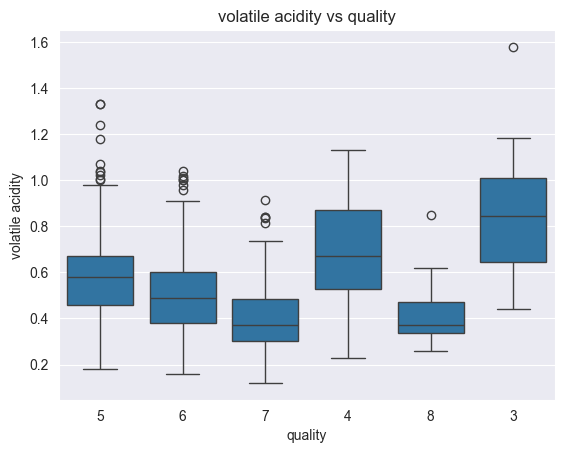

In [96]:
# compare quality with critic acid
sns.boxplot(x=wine_df_copy['quality'], y=wine_df_copy['volatile acidity'])
plt.title('volatile acidity vs quality')

In [97]:
# split the dataset
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [98]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [99]:
# define model
model = keras.Sequential()

In [100]:
model.add(layers.Dense(11, activation='relu', input_dim=11))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
# compile and fit the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, batch_size=100, validation_split=0.22, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3889 - loss: 5.8884 - val_accuracy: 0.4347 - val_loss: 3.9116
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3833 - loss: 3.7737 - val_accuracy: 0.4006 - val_loss: 2.7385
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3288 - loss: 2.8505 - val_accuracy: 0.3693 - val_loss: 2.2068
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3119 - loss: 2.3677 - val_accuracy: 0.4091 - val_loss: 1.8969
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3841 - loss: 2.0542 - val_accuracy: 0.4545 - val_loss: 1.6951
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4483 - loss: 1.8363 - val_accuracy: 0.4545 - val_loss: 1.5676
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4459 - loss: 1.6915 - val_accuracy: 0.4659 - val_loss: 1.4961
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 1.6028 - val_accuracy: 0.4972 - v

In [102]:
# summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506 (1.98 KB)

 Trainable params: 252 (1008.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 254 (1020.00 B)

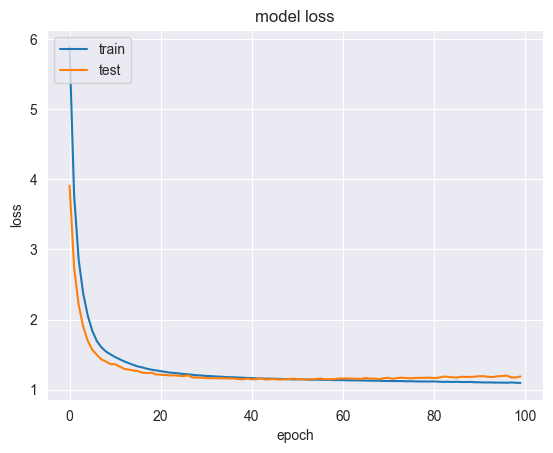

In [103]:
# visualize the results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

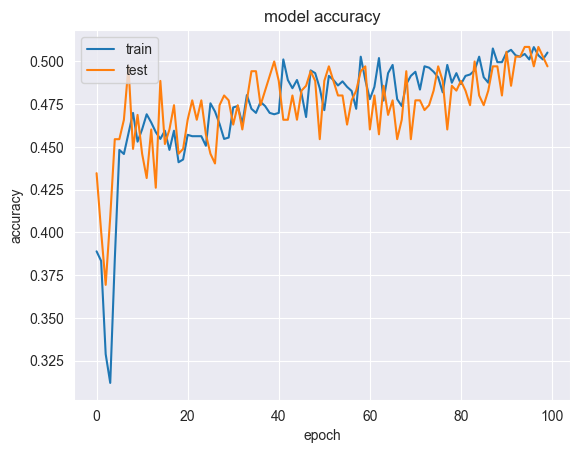

In [104]:
# plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
import numpy as np

#input for 11 features
Xnew = np.array([[7.6,0.31,0.34,2.5,0.081,26.0,35.0,0.99356,3.22,0.59,12.5]])

#convert into numpy array
Xnew = np.array(Xnew, dtype=np.float64)

#making the prediction
Ynew = model.predict(Xnew)

print(Ynew)

max_index_row = np.argmax(Ynew, axis=1)

print(max_index_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[8.2986378e-05 2.6351479e-05 8.9559879e-05 6.7691216e-03 1.3139383e-02
  6.7290463e-02 6.7015105e-01 2.3186301e-01 1.0574795e-02 1.3255361e-05]]
[6]


In [106]:
# save the model
model.save('models/wine_model.keras')

In [107]:
# load model
from tensorflow.keras.models import load_model
loaded_wine_model = load_model('models/wine_model.keras')